In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from copy import deepcopy

In [2]:
def removeEdges(n, G):
    minor = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < n]
    G.remove_edges_from(minor)
    return G

def removeNodes(n, G):
    minor_actors = []
    for x in G.nodes:
        if G.degree(x) < n:
            minor_actors.append(x)

    G.remove_nodes_from(minor_actors)
    return G

def get_centrality(G):
    df = pd.DataFrame(index=G.nodes())
    df['Degree'] = pd.Series(dict(G.degree()))
    df['Degree Centrality'] = pd.Series(nx.degree_centrality(G))
    df['Closeness Centrality'] = pd.Series(nx.closeness_centrality(G))
    df['Betweenness Centrality'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
    df = df.sort_values(by=['Degree'], ascending=False)
    return df


def get_degree_centrality(G):
    df = pd.DataFrame(index=G.nodes())
    df['Degree'] = pd.Series(dict(G.degree()))
    df['Degree Centrality'] = pd.Series(nx.degree_centrality(G))
    df = df.sort_values(by=['Degree'], ascending=False)
    return df

def get_closeness_centrality(G):
    df = pd.DataFrame(index=G.nodes())
    df['Degree'] = pd.Series(dict(G.degree()))
    df['Closeness Centrality'] = pd.Series(nx.closeness_centrality(G))
    df = df.sort_values(by=['Degree'], ascending=False)
    return df

def get_betweeness_centrality(G):
    df = pd.DataFrame(index=G.nodes())
    df['Degree'] = pd.Series(dict(G.degree()))
    df['Betweenness Centrality'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
    df = df.sort_values(by=['Degree'], ascending=False)
    return df

def get_JC(G):
    df = pd.DataFrame(index=nx.non_edges(G))
    CommNeighbor = {}
    JaccardCoef = {}
    for edge in nx.non_edges(G): 
        CommNeighbor[edge[0],edge[1]] = len(list(nx.common_neighbors(G,edge[0],edge[1])))
    for value in list(nx.jaccard_coefficient(G)): 
        JaccardCoef[value[0],value[1]] = round(value[2],1)
    df['Common Neighbor'] = pd.Series(CommNeighbor)
    df['Jaccard Coefficient'] = pd.Series(JaccardCoef)
    df = df.sort_values(['Jaccard Coefficient', 'Common Neighbor'], ascending=False)
    return df

## Importing the dataset

In [3]:
datafile = open('ScriptOutput/movie-actor-dataset1.txt')
data = datafile.readlines()

g = nx.Graph()
weight_list = {}
actorMovieDic = {}

print(len(data))

1288


## Converting the dataset into a graph

In [4]:
# Connecting actor nodes if there is a common movie and also adding weight. 1 common movie means weight is increased by 1.
for row in data:
    cleanRow = row.strip('\n').split('/')
    for i in range(1,len(cleanRow)):
        for j in range(1,len(cleanRow)):
            if i < j:
                if g.has_edge(cleanRow[i],cleanRow[j])==False:
                    g.add_edge(cleanRow[i],cleanRow[j], weight=1)
                else:
                    g[cleanRow[i]][cleanRow[j]]['weight'] = g[cleanRow[i]][cleanRow[j]]['weight']+1

In [5]:
# Check the number of nodes and edges in our graph
print("Edges: ", g.number_of_edges())
print("Nodes: ", g.number_of_nodes())

Edges:  1453761
Nodes:  21143


## Creating actorMovie dictionary

In [6]:
# Extract movie and actor names and store it in a dictonary called actorMovieDic where actor's name is key and the movies they worked in is the value.
for r in data:
    cleanRow = r.strip('\n').split('/')
    movie = cleanRow[0]
    for i in range(1, len(cleanRow)):
        if cleanRow[i] in actorMovieDic.keys():
            actorMovieDic[cleanRow[i]].append(movie)
        else:
            actorMovieDic[cleanRow[i]] = []
            actorMovieDic[cleanRow[i]].append(movie)

print(actorMovieDic['Nelson, Jerry (I)'])

['Adventures of Elmo in Grouchland, The (1999)', 'Great Muppet Caper, The (1981)', 'Muppet Christmas Carol, The (1992)', 'Muppet Movie, The (1979)', 'Muppet Treasure Island (1996)', 'Muppets from Space (1999)', 'Muppets Take Manhattan, The (1984)', 'Sesame Street Presents: Follow that Bird (1985)']


In [7]:
# Sum of the movies each actor has worked in
actorSize = {}
for i in actorMovieDic:
        actorSize[i] = len(actorMovieDic[i])
actorSize

{'Sibaldi, Stefano': 1,
 'Rizzo, Gianni': 1,
 'Dávila, Luis': 2,
 'Jeffries, Lang': 1,
 'Hansen, Joachim': 1,
 'Braun, Pinkas': 2,
 'Felleghy, Tom': 4,
 'Martín, Daniel (I)': 2,
 'Marturano, Gino': 1,
 'Addobbati, Giuseppe': 1,
 'Karlsen, John': 4,
 'Jaspe, José': 4,
 'Dakkar': 1,
 'Bartha, John': 4,
 'Halvorsen, Lisa': 1,
 'Smyrner, Ann': 1,
 'Pamphili, Mirella': 2,
 'Persson, Essy': 1,
 'Carey Jr., Harry': 4,
 'Di Marco, Gildo': 1,
 'Spencer, Bud': 3,
 'Louis, Jean (II)': 3,
 'Fanfoni, Vittorio': 3,
 'Galimberti, Gilberto': 3,
 'Ressel, Franco': 6,
 'Arena, Fortunato': 4,
 'Hill, Terence': 3,
 'Norton, Tony (I)': 1,
 'Pizzuti, Riccardo': 2,
 'Boschetti, Bruno': 3,
 'Landry, Gérard': 1,
 'Fiermonte, Enzo': 4,
 'De Luca, Pupo': 2,
 'Antonini, Artemio': 3,
 'Tarascio, Enzo': 1,
 'Delle Piane, Emilio': 1,
 'Stefanelli, Benito': 1,
 'Bonos, Luigi': 4,
 'Meniconi, Furio': 4,
 'Susani, Angelo': 1,
 'Micantoni, Adriano': 1,
 'Somer, Yanti': 1,
 'Dublin, Jessica': 1,
 'Ghia, Dana': 1,
 'Caesa

<h1>No Threshold</h1> 

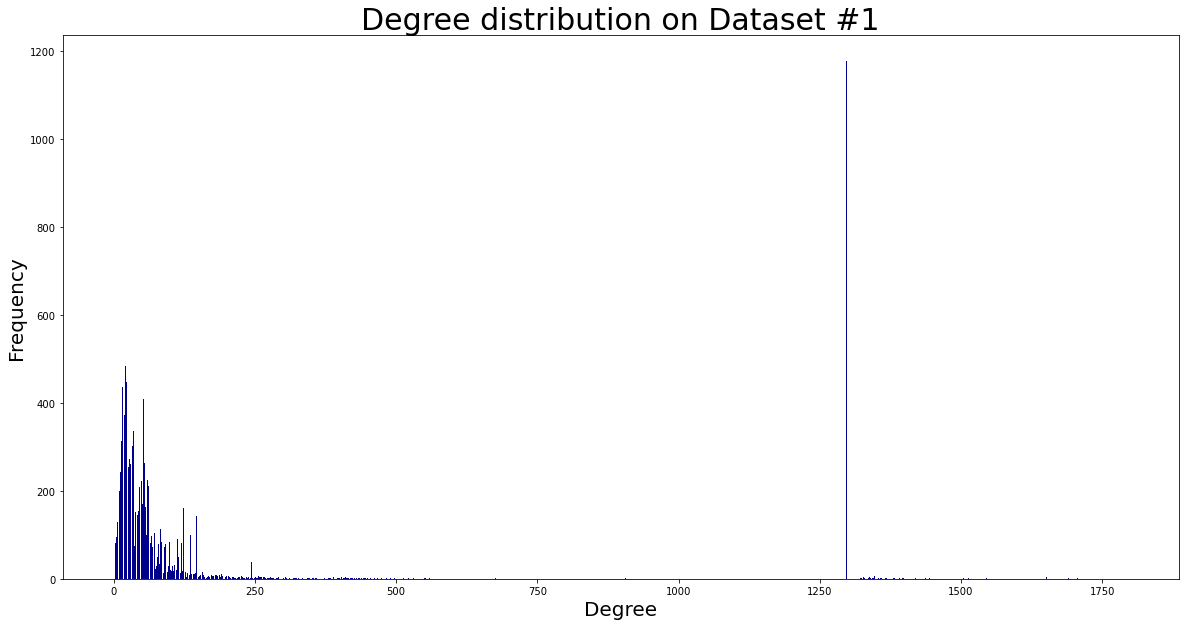

In [8]:
# Degree distribution graph representing each degree and frequency
x = list(range(0, len(nx.degree_histogram(g))))
y = nx.degree_histogram(g)

plt.figure(figsize=(20,10))
plt.bar(x, y, color='darkblue')
plt.title('Degree distribution on Dataset #1', fontsize=30)
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

<h1>Threshold 1 (Mainly for Visualization)</h1> 

### Edge weight < 5 and node degree < 2

In [9]:
g1 = deepcopy(g)
g1 = removeEdges(5, g1)
g1 = removeNodes(2, g1)

# Check the number of nodes and edges in our graph
print("Edges: ", g1.number_of_edges())
print("Nodes: ", g1.number_of_nodes())

Edges:  125
Nodes:  51


In [10]:
# Sum of the weights of each degree of a node
actorSize_Updated = {}
for i in actorSize:
    if g1.has_node(i):
        actorSize_Updated[i] = actorSize[i]

# List of degree for each node
sizes = list(actorSize_Updated.values())

# Adjusting the values of the degree so that the nodes can be differentiated while plotting
scaled_sizes = []
for i in sizes:
    scaled_sizes.append(i * 300)
    
print(nx.adjacency_matrix(g1))

  (0, 6)	11
  (0, 7)	6
  (0, 9)	6
  (1, 2)	8
  (1, 3)	7
  (1, 4)	7
  (2, 1)	8
  (2, 3)	7
  (2, 4)	7
  (3, 1)	7
  (3, 2)	7
  (3, 4)	7
  (4, 1)	7
  (4, 2)	7
  (4, 3)	7
  (5, 7)	5
  (5, 8)	8
  (5, 10)	7
  (5, 11)	9
  (5, 12)	6
  (5, 13)	8
  (5, 20)	7
  (5, 25)	6
  (5, 26)	6
  (5, 29)	5
  :	:
  (46, 48)	5
  (46, 49)	5
  (47, 40)	5
  (47, 43)	5
  (47, 44)	5
  (47, 45)	5
  (47, 46)	5
  (47, 48)	5
  (47, 49)	5
  (48, 40)	5
  (48, 43)	5
  (48, 44)	5
  (48, 45)	5
  (48, 46)	5
  (48, 47)	5
  (48, 49)	5
  (49, 40)	5
  (49, 43)	5
  (49, 44)	5
  (49, 45)	5
  (49, 46)	5
  (49, 47)	5
  (49, 48)	5
  (50, 30)	5
  (50, 34)	5


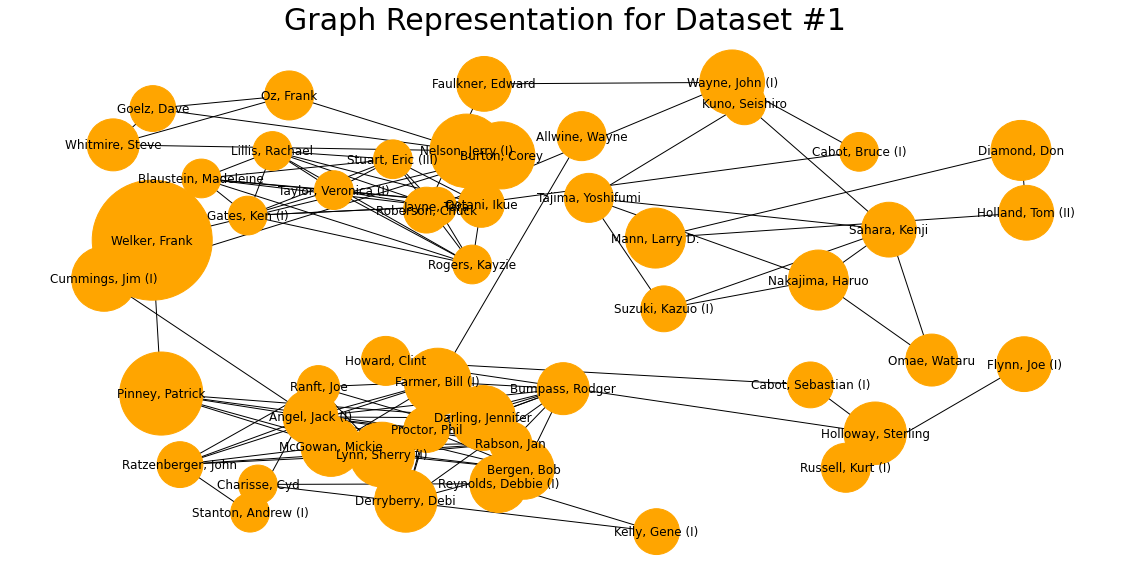

In [11]:
plt.figure(figsize =(20,10)) 
plt.title('Graph Representation for Dataset #1', fontsize=30, backgroundcolor= 'white')
pos = nx.spring_layout(g1, k=0.8, iterations=25)
nx.draw(g1, pos, with_labels=True, node_size=scaled_sizes, node_color='orange')

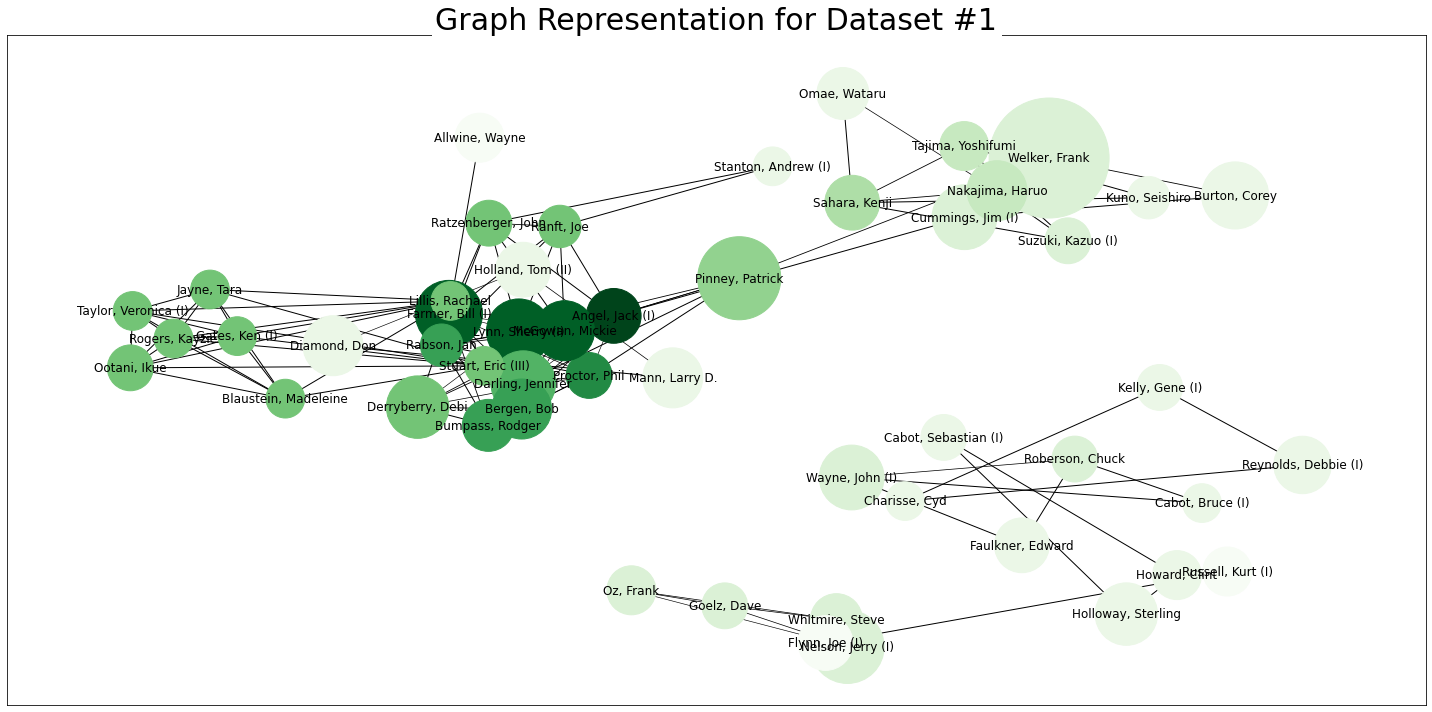

In [12]:
plt.figure(figsize =(20,10)) 
plt.title('Graph Representation for Dataset #1', fontsize=30, backgroundcolor= 'white')
pos = nx.spring_layout(g1, k=0.7, iterations=25)
node_color = [g1.degree(v) for v in g1] 
edge_width = [5 * (1/g1[u][v]['weight']) for u, v in g1.edges()] 
nx.draw_networkx(g1, pos, with_labels=True, node_size = scaled_sizes, node_color=node_color, width=edge_width, cmap=plt.cm.Greens)
plt.tight_layout();

In [13]:
# Finding Centrality
df1 = get_centrality(g1)
df1.head(25)

,Degree,Degree Centrality,Closeness Centrality,Betweenness Centrality
"Angel, Jack (I)",13,0.26,0.275238,0.027887
"Farmer, Bill (I)",12,0.24,0.240833,0.016105
"McGowan, Mickie",12,0.24,0.251304,0.006404
"Lynn, Sherry (I)",12,0.24,0.251304,0.006404
"Proctor, Phil",10,0.20,0.222308,0.002282
"Bumpass, Rodger",9,0.18,0.206429,0.000350
"Rabson, Jan",9,0.18,0.214074,0.001469
"Bergen, Bob",9,0.18,0.206429,0.000350
"Darling, Jennifer",8,0.16,0.206429,0.001197
"Blaustein, Madeleine",7,0.14,0.140000,0.000000


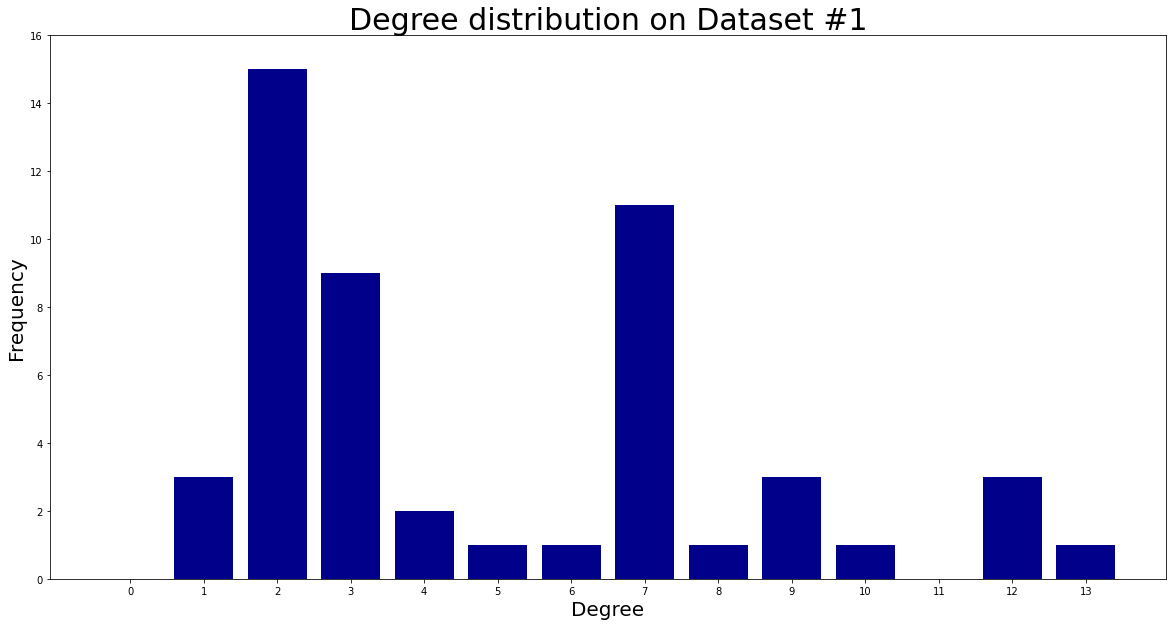

In [14]:
# Degree distribution graph representing each degree and frequency
x = list(range(0, len(nx.degree_histogram(g1))))
y = nx.degree_histogram(g1)

plt.figure(figsize=(20,10))
plt.bar(x, y, color='darkblue')
plt.xticks(x)
plt.yticks([0,2,4,6,8,10,12,14,16])
plt.title('Degree distribution on Dataset #1', fontsize=30)
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

In [15]:
# Total cliques
cliquesList = list(nx.find_cliques(g1))
for clique in cliquesList:
    print("Size:", len(clique), clique)
print("Total Cliques: ", len(cliquesList))

Size: 4 ['Goelz, Dave', 'Whitmire, Steve', 'Oz, Frank', 'Nelson, Jerry (I)']
Size: 8 ['Gates, Ken (I)', 'Rogers, Kayzie', 'Blaustein, Madeleine', 'Stuart, Eric (III)', 'Jayne, Tara', 'Ootani, Ikue', 'Lillis, Rachael', 'Taylor, Veronica (I)']
Size: 3 ['Holloway, Sterling', 'Howard, Clint', 'Cabot, Sebastian (I)']
Size: 3 ['Faulkner, Edward', 'Wayne, John (I)', 'Roberson, Chuck']
Size: 3 ['Nakajima, Haruo', 'Sahara, Kenji', 'Omae, Wataru']
Size: 4 ['Nakajima, Haruo', 'Sahara, Kenji', 'Tajima, Yoshifumi', 'Suzuki, Kazuo (I)']
Size: 3 ['Cabot, Bruce (I)', 'Wayne, John (I)', 'Roberson, Chuck']
Size: 2 ['Flynn, Joe (I)', 'Russell, Kurt (I)']
Size: 3 ['Holland, Tom (II)', 'Mann, Larry D.', 'Diamond, Don']
Size: 3 ['Stanton, Andrew (I)', 'Ranft, Joe', 'Ratzenberger, John']
Size: 3 ['Charisse, Cyd', 'Reynolds, Debbie (I)', 'Kelly, Gene (I)']
Size: 7 ['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Rabson, Jan', 'Ranft, Joe', 'Ratzenberger, John']
Size: 8 ['Angel, 

In [16]:
# Jaccard Coefficient
df2 = get_JC(g1)
df2.head(25)

,Common Neighbor,Jaccard Coefficient
"(Faulkner, Edward, Cabot, Bruce (I))",2,1.0
"(Derryberry, Debi, Darling, Jennifer)",7,0.9
"(Derryberry, Debi, Rabson, Jan)",7,0.8
"(Rabson, Jan, Darling, Jennifer)",7,0.7
"(Suzuki, Kazuo (I), Omae, Wataru)",2,0.7
"(Suzuki, Kazuo (I), Kuno, Seishiro)",2,0.7
"(Bergen, Bob, Pinney, Patrick)",5,0.5
"(Bergen, Bob, Ratzenberger, John)",5,0.5
"(Bergen, Bob, Ranft, Joe)",5,0.5
"(Bumpass, Rodger, Pinney, Patrick)",5,0.5


<h1>Threshold 2 (Centrality and JC)</h1> 

### Remove edges and nodes if edge weight < 2 and nodes < 2

In [17]:
g2 = deepcopy(g)
g2 = removeEdges(2, g2)
g2 = removeNodes(2, g2)

# Check the number of nodes and edges in our graph
print("Edges: ", g2.number_of_edges())
print("Nodes: ", g2.number_of_nodes())

Edges:  8432
Nodes:  1519


In [18]:
# Finding Centrality
df3 = get_centrality(g2)
df3.head(25)

,Degree,Degree Centrality,Closeness Centrality,Betweenness Centrality
"Welker, Frank",97,0.063900,0.256643,0.135131
"Rooney, Mickey (I)",84,0.055336,0.237553,0.052265
"Reynolds, Debbie (I)",73,0.048090,0.219408,0.025364
"Kelly, Gene (I)",73,0.048090,0.211659,0.003266
"Proctor, Phil",70,0.046113,0.219259,0.010948
"Garland, Judy (I)",68,0.044796,0.205521,0.001676
"Charisse, Cyd",67,0.044137,0.205477,0.001110
"Astaire, Fred",67,0.044137,0.219408,0.010322
"Miller, Ann (I)",66,0.043478,0.205434,0.001004
"Williams, Esther (I)",66,0.043478,0.205434,0.001004


In [19]:
df4 = get_JC(g2)
df4.head(25)

,Common Neighbor,Jaccard Coefficient
"(Court, Alyson, Goy, Luba)",5,1.0
"(Brodhead, James, Hayes, John (II))",3,1.0
"(Saito, Noritake, Saijo, Yasuhiko)",2,1.0
"(Matsushita, Hiromi (I), Furuta, Toshihiko)",2,1.0
"(Carroll, Pat (I), Stewart, Patrick (I))",2,1.0
"(Carroll, Pat (I), Lloyd, Christopher (I))",2,1.0
"(Ward, Dervis, Lemkow, Tutte)",2,1.0
"(Owens, John (I), Medwin, Michael)",2,1.0
"(Fleet, Stanley, Gable, Christopher)",2,1.0
"(Lloyd, Christopher (I), Stewart, Patrick (I))",2,1.0


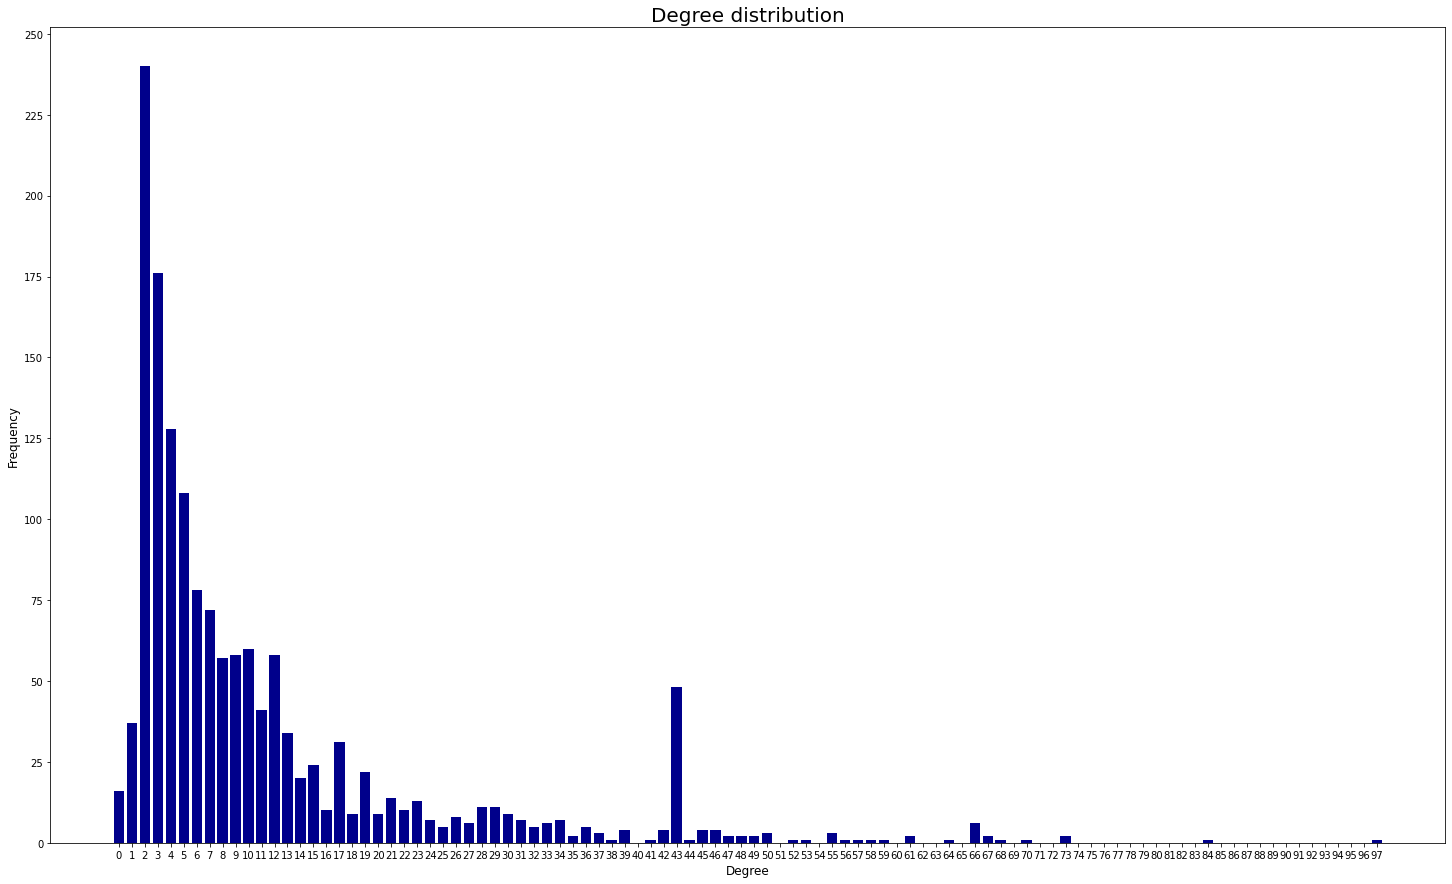

In [20]:
# Degree distribution graph representing each degree and frequency
x = list(range(0, len(nx.degree_histogram(g2))))
y = nx.degree_histogram(g2)

plt.figure(figsize=(25,15))
plt.bar(x, y, color='darkblue')
plt.xticks(x)
plt.yticks([0,25,50,75,100,125,150,175,200,225,250])
plt.title('Degree distribution', fontsize=20)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [21]:
# Total cliques
cliquesList = list(nx.find_cliques(g2))
for clique in cliquesList:
    print("Size:", len(clique), clique)
print("Total Cliques: ", len(cliquesList))

Size: 6 ['Rolofson, Bobby', 'Buzzi, Ruth', 'Wheeler, John (I)', 'Osmond, Cliff', 'Perkins, Jack (I)', 'McCready, Ed']
Size: 10 ['Ito, Hisaya', 'Tazaki, Jun', 'Sawamura, Ikio', 'Sekita, Hiroshi', 'Nakajima, Haruo', 'Sahara, Kenji', 'Kirino, Nadao', 'Uno, Koji', 'Tajima, Yoshifumi', 'Kuno, Seishiro']
Size: 5 ['Garrett, Brad (I)', 'Harnell, Jess', 'Ranft, Joe', 'Stanton, Andrew (I)', 'Ratzenberger, John']
Size: 3 ['Garrett, Brad (I)', 'Harnell, Jess', 'Rocco, Alex']
Size: 5 ['Garrett, Brad (I)', 'Ranft, Jordan', 'Ranft, Joe', 'Stanton, Andrew (I)', 'Ratzenberger, John']
Size: 2 ['Garrett, Brad (I)', 'Taylor, Russi']
Size: 13 ['Green, Dan (III)', 'Rogers, Kayzie', 'Blaustein, Madeleine', 'Birnbaum, Amy', 'Gates, Ken (I)', 'Stuart, Eric (III)', 'Ootani, Ikue', 'Jayne, Tara', 'Kay, Roger (II)', 'Lillis, Rachael', 'Taylor, Veronica (I)', 'Hart, Stan (I)', 'Paul, Ed (II)']
Size: 5 ['Lusk, Freeman', 'Frees, Paul', 'Seay, James', 'Giglio, Sandro', 'Lee, Rudy']
Size: 3 ['Lusk, Freeman', 'Frees, P